# Solving the Frozen Lake Problem with Value Iteration

The frozen lake environment is shown: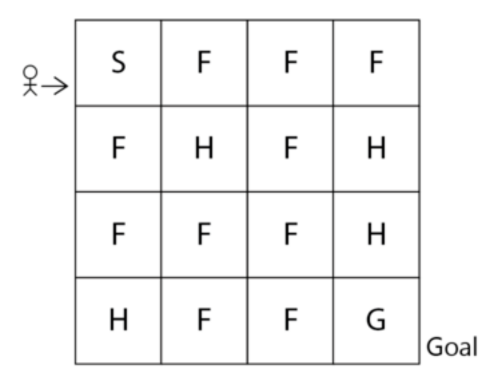

  
* S implies the starting state
* F implies the frozen states
* H implies the hold states
* G implies the goal state

The goal is to reach the goal state G from the starting state S without visiting the hole states H.

How can we achieve this goal? That is, how can we reach the state G from S without
visiting H? We learned that the optimal policy tells the agent to perform correct action in
each state. So, if we find the optimal policy then we can reach the state G from S visiting the state H. Okay, how to find the optimal policy? We can use the value iteration method
we just learned to find the optimal policy.


Remember that all our states (S to G) will be encoded from 0 to 16 and all the four actions -
left, down, up, right will be encoded from 0 to 3 in the gym toolkit.
So, in this section, we will learn how to find the optimal policy using the value iteration
method so that the agent can reach the state G from S without visiting H.

First, let's import the necessary libraries:

In [14]:
#!pip install gymnasium
import gymnasium
import numpy as np

Now, let's create the frozen lake environment using gym:

In [7]:
env = gymnasium.make('FrozenLake-v1',render_mode="rgb_array")

Let's look at the frozen lake environment using the render function:

In [15]:
env.reset()
env.render()
env = env.unwrapped

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
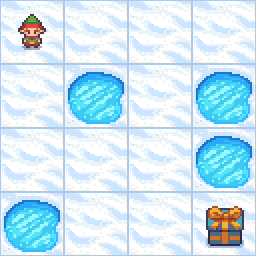

In [16]:
env.render()

As we can notice, our agent is in the state S and it has to reach the state G without visiting
the states H. So, let's learn how to compute the optimal policy using the value iteration
method.

First, let's learn how to compute the optimal value function and then we will see how to
extract the optimal policy from the computed optimal value function.


## Computing optimal value function

We will define a function called `value_iteration` where we compute the optimal value
function iteratively by taking maximum over Q function. For
better understanding, let's closely look at the every line of the function and then we look at
the complete function at the end which gives us more clarity.



Define `value_iteration` function which takes the environment as a parameter:
    
    

In [9]:
def value_iteration(env):

    #set the number of iterations
    num_iterations = 1000

    #set the threshold number for checking the convergence of the value function
    threshold = 1e-20

    #we also set the discount factor
    gamma = 1.0

    #now, we will initialize the value table, with the value of all states to zero
    value_table = np.zeros(env.observation_space.n)

    #for every iteration
    for i in range(num_iterations):

        #update the value table, that is, we learned that on every iteration, we use the updated value
        #table (state values) from the previous iteration
        updated_value_table = np.copy(value_table)

        #now, we compute the value function (state value) by taking the maximum of Q value.

        #thus, for each state, we compute the Q values of all the actions in the state and then
        #we update the value of the state as the one which has maximum Q value as shown below:
        for s in range(env.observation_space.n):

            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                   for a in range(env.action_space.n)]

            value_table[s] = max(Q_values)

        #after computing the value table, that is, value of all the states, we check whether the
        #difference between value table obtained in the current iteration and previous iteration is
        #less than or equal to a threshold value if it is less then we break the loop and return the
        #value table as our optimal value function as shown below:

        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             break

    return value_table

Now, that we have computed the optimal value function by taking the maximum over Q
values, let's see how to extract the optimal policy from the optimal value function.


## Extracting optimal policy from the optimal value function

In the previous step, we computed the optimal value function. Now, let see how to extract
the optimal policy from the computed optimal value function.


First, we define a function called `extract_policy` which takes the `value_table` as a
parameter:


In [10]:
def extract_policy(value_table):

    #set the discount factor
    gamma = 1.0

    #first, we initialize the policy with zeros, that is, first, we set the actions for all the states to
    #be zero
    policy = np.zeros(env.observation_space.n)

    #now, we compute the Q function using the optimal value function obtained from the
    #previous step. After computing the Q function, we can extract policy by selecting action which has
    #maximum Q value. Since we are computing the Q function using the optimal value
    #function, the policy extracted from the Q function will be the optimal policy.

    #As shown below, for each state, we compute the Q values for all the actions in the state and
    #then we extract policy by selecting the action which has maximum Q value.

    #for each state
    for s in range(env.observation_space.n):

        #compute the Q value of all the actions in the state
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                   for a in range(env.action_space.n)]

        #extract policy by selecting the action which has maximum Q value
        policy[s] = np.argmax(np.array(Q_values))

    return policy

That's it! Now, we will see how to extract the optimal policy in our frozen lake
environment.

## Putting it all together
We learn that in the frozen lake environment our goal is to find the optimal policy which
selects the correct action in each state so that we can reach the state G from the state
A without visiting the hole states.

First, we compute the optimal value function using our `value_iteration` function by
passing our frozen lake environment as the parameter:


In [11]:
optimal_value_function = value_iteration(env=env)

Next, we extract the optimal policy from the optimal value function using our
extract_policy function as shown below:

In [12]:
optimal_policy = extract_policy(optimal_value_function)

We can print the obtained optimal policy:

In [13]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


As we can observe, our optimal policy tells us to
perform the correct action in each state.
